In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from PIL import Image

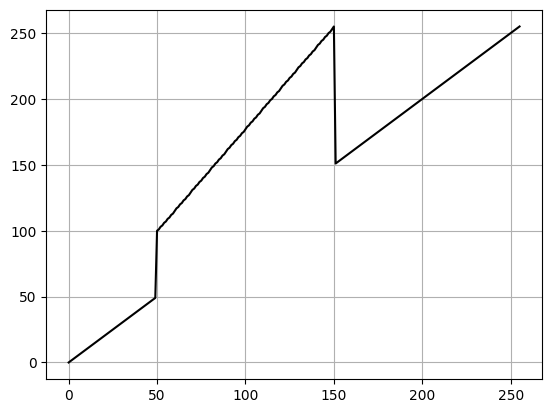

In [2]:
transform = np.arange(0, 256, 1).astype(np.uint8)
transform[50:151] = np.linspace(100, 255, 101).astype(np.uint8)
plt.plot(np.arange(0, 256), transform, color='black')
plt.grid()
plt.show()

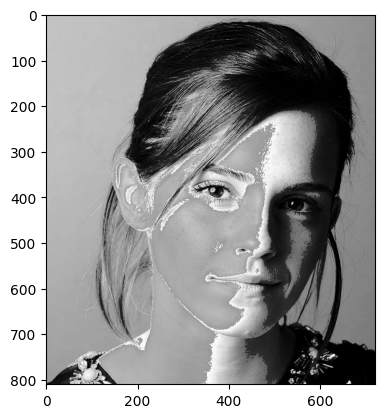

In [3]:
img = Image.open('a1images/emma.jpg')
img = cv.cvtColor(np.array(img), cv.COLOR_BGR2GRAY)
img = cv.LUT(img, transform)
plt.imshow(img, cmap='gray')
plt.show()

In [4]:
# %matplotlib tk
%matplotlib inline

(217, 181)


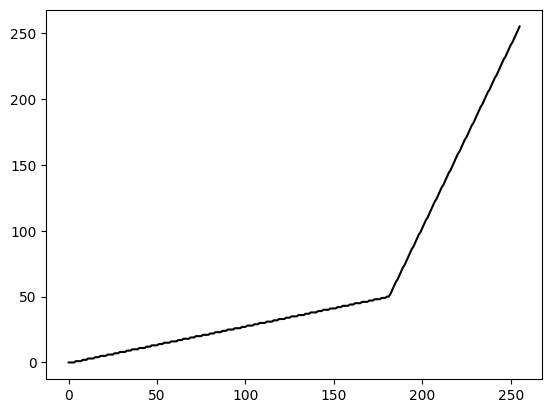

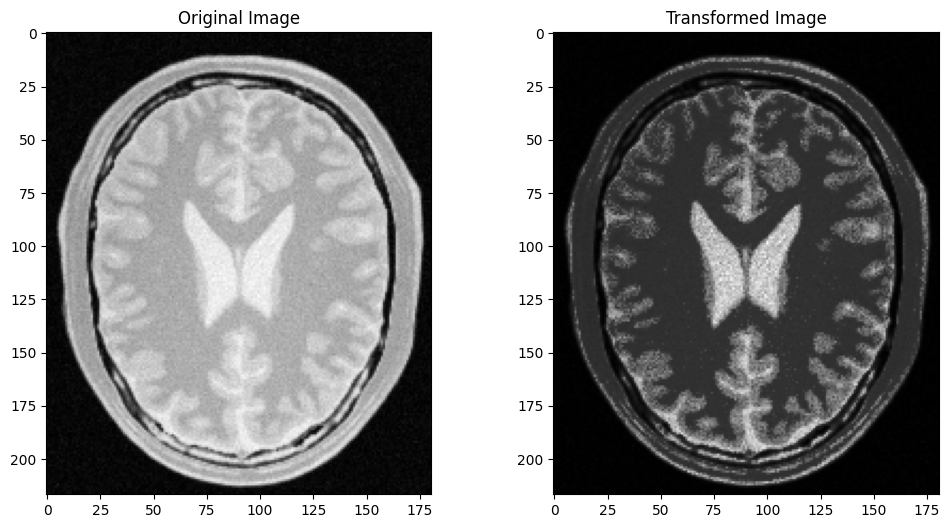

In [5]:

brain_scan = Image.open('a1images/brain_proton_density_slice.png')
brain_scan = np.array(brain_scan)
print(brain_scan.shape)

white_matter_transform = np.zeros((256,), dtype=np.uint8) + 255
white_matter_transform[0:181] = np.linspace(0, 50, 181).astype(np.uint8)
white_matter_transform[181:256] = np.linspace(50, 255, 75).astype(np.uint8)
white_matter = cv.LUT(brain_scan, white_matter_transform)

fig, axs = plt.subplots(1, 1)
axs.plot(np.arange(0, 256), white_matter_transform, color='black')   
plt.show()


afig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(brain_scan, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(white_matter, cmap='gray')
axs[1].set_title('Transformed Image')
plt.show()

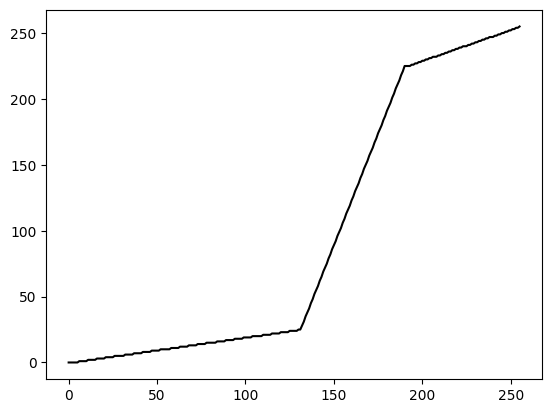

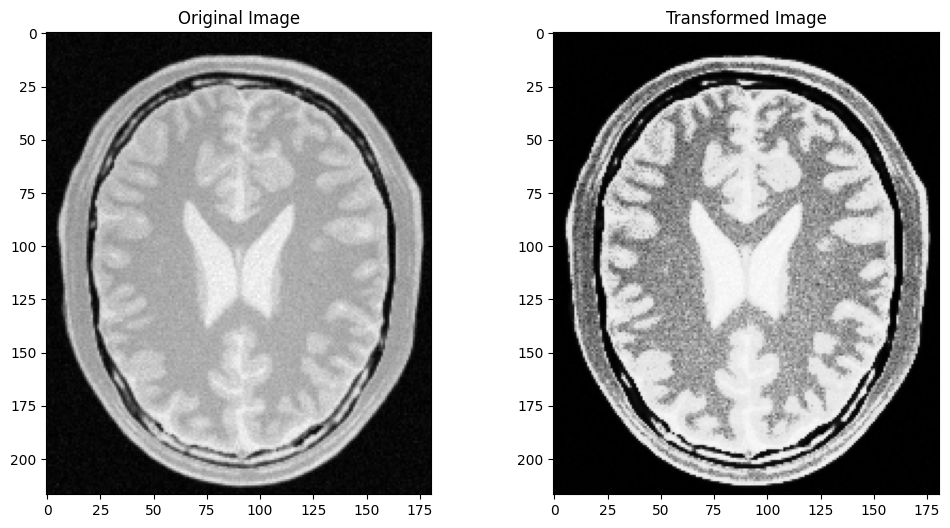

In [6]:
black_matter_transform = np.zeros((256,), dtype=np.uint8)
black_matter_transform[0:131] = np.linspace(0, 25, 131).astype(np.uint8)
black_matter_transform[131:191] = np.linspace(25, 225, 60).astype(np.uint8)
black_matter_transform[191:256] = np.linspace(225, 255, 65).astype(np.uint8)

black_matter = cv.LUT(brain_scan, black_matter_transform)

fig, axs = plt.subplots(1, 1)   
axs.plot(np.arange(0, 256), black_matter_transform, color='black')   
plt.show()


fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(brain_scan, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(black_matter, cmap='gray')
axs[1].set_title('Transformed Image')
plt.show()

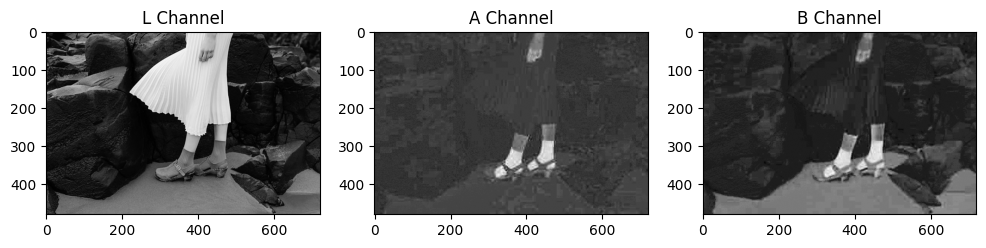

In [7]:
highlights_img = Image.open('a1images/highlights_and_shadows.jpg')

highlights_img = np.array(highlights_img)
highlights_img_lab = cv.cvtColor(highlights_img, cv.COLOR_RGB2Lab)

fig, axs = plt.subplots(1, 3, figsize=(12, 6))
axs[0].imshow(highlights_img_lab[:, :, 0], cmap='gray')
axs[0].set_title('L Channel')
axs[1].imshow(highlights_img_lab[:, :, 1], cmap='gray')
axs[1].set_title('A Channel')
axs[2].imshow(highlights_img_lab[:, :, 2], cmap='gray')
axs[2].set_title('B Channel')   
plt.show()

Text(0.5, 1.0, 'Gamma Correction Table')

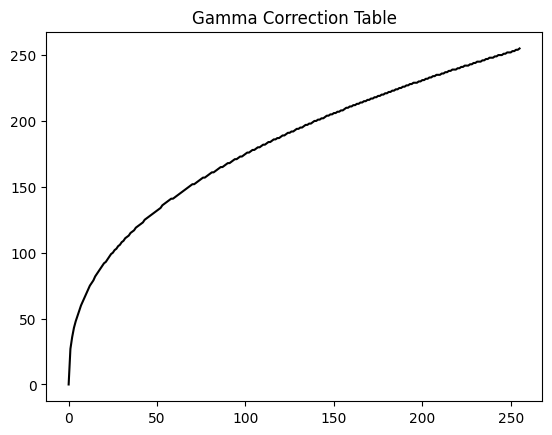

In [8]:
l = 2.5
inv_l = 1.0 / l
table = np.array([((i / 255.0) ** inv_l) * 255.0 for i in range(256)], dtype=np.uint8)

fig, axs = plt.subplots(1, 1)
axs.plot(np.arange(0, 256), table, color='black')
axs.set_title('Gamma Correction Table')

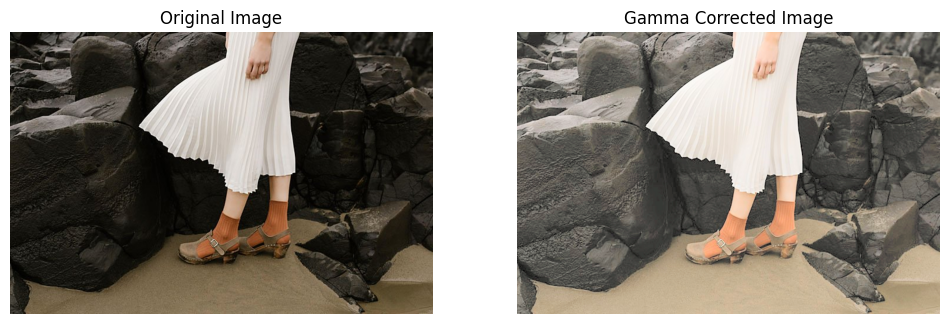

In [9]:
highlights_img_gc = highlights_img_lab.copy()
highlights_img_gc[:, :, 0] = cv.LUT(highlights_img_lab[:, :, 0], table)


highlights_img_gc = cv.cvtColor(highlights_img_gc, cv.COLOR_Lab2RGB)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(highlights_img)
axs[0].set_title('Original Image')
axs[0].axis('off')
axs[1].imshow(highlights_img_gc)
axs[1].set_title('Gamma Corrected Image')
plt.axis('off')
plt.show()


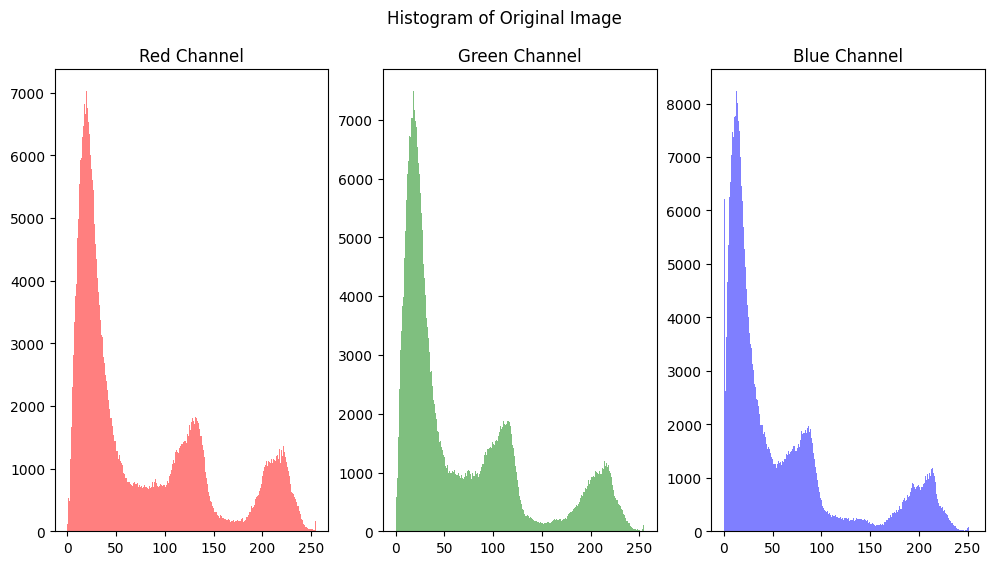

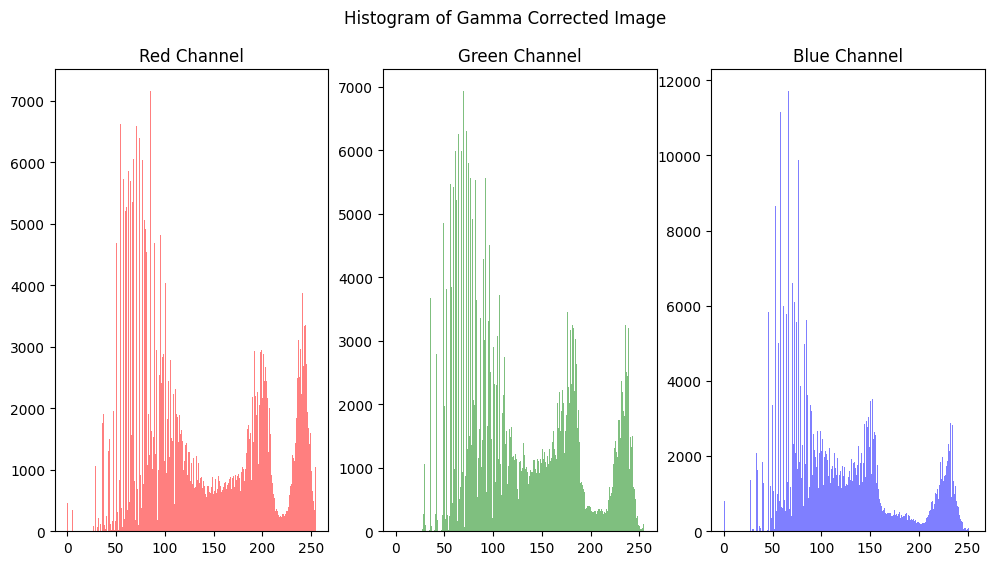

In [10]:
# histogram of the original image
fig, axs = plt.subplots(1, 3, figsize=(12, 6))
axs[0].hist(highlights_img[:, :, 0].ravel(), bins=256, color='red', alpha=0.5)
axs[0].set_title('Red Channel')
axs[1].hist(highlights_img[:, :, 1].ravel(), bins=256, color='green', alpha=0.5)
axs[1].set_title('Green Channel')
axs[2].hist(highlights_img[:, :, 2].ravel(), bins=256, color='blue', alpha=0.5)
axs[2].set_title('Blue Channel')
plt.suptitle('Histogram of Original Image')
plt.show()

# histogram of the gamma corrected image
fig, axs = plt.subplots(1, 3, figsize=(12, 6))
axs[0].hist(highlights_img_gc[:, :, 0].ravel(), bins=256, color='red', alpha=0.5)
axs[0].set_title('Red Channel')
axs[1].hist(highlights_img_gc[:, :, 1].ravel(), bins=256, color='green', alpha=0.5)
axs[1].set_title('Green Channel')
axs[2].hist(highlights_img_gc[:, :, 2].ravel(), bins=256, color='blue', alpha=0.5)
axs[2].set_title('Blue Channel')
plt.suptitle('Histogram of Gamma Corrected Image')
plt.show()

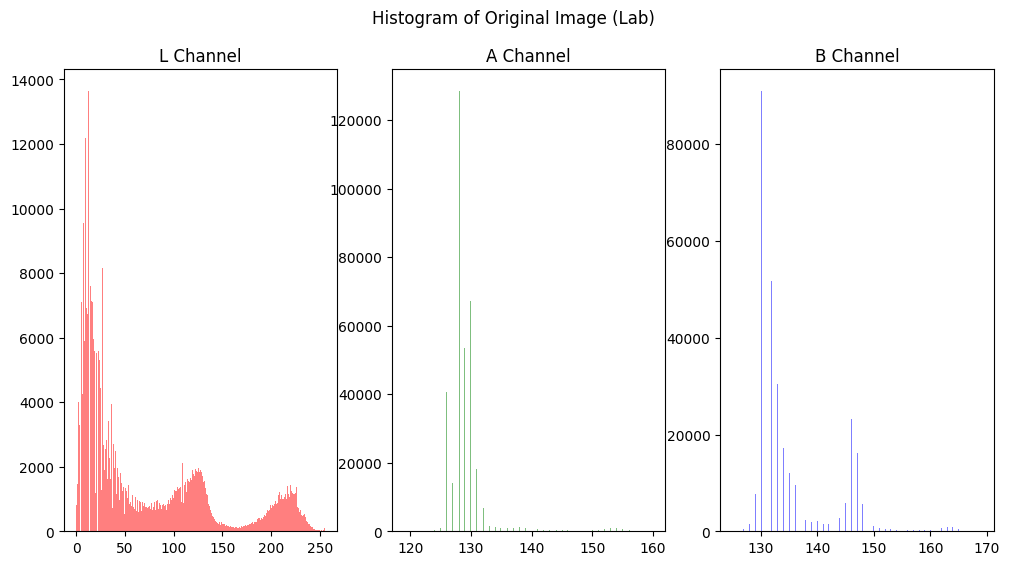

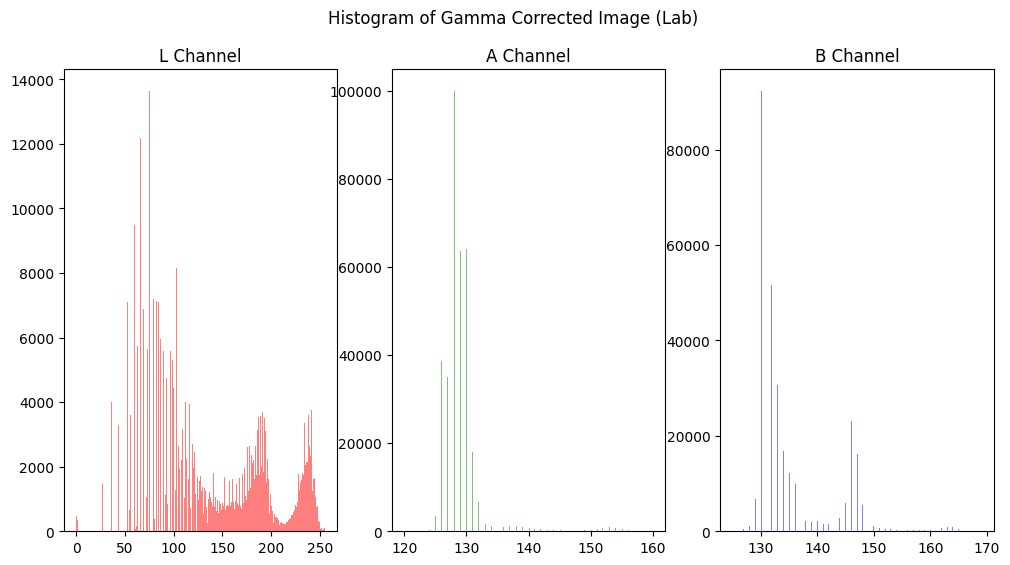

In [11]:
# histogram of the original image (Lab)
fig, axs = plt.subplots(1, 3, figsize=(12, 6))
axs[0].hist(highlights_img_lab[:, :, 0].ravel(), bins=256, color='red', alpha=0.5)
axs[0].set_title('L Channel')
axs[1].hist(highlights_img_lab[:, :, 1].ravel(), bins=256, color='green', alpha=0.5)
axs[1].set_title('A Channel')
axs[2].hist(highlights_img_lab[:, :, 2].ravel(), bins=256, color='blue', alpha=0.5)
axs[2].set_title('B Channel')
plt.suptitle('Histogram of Original Image (Lab)')
plt.show()

# histogram of the gamma corrected image (Lab)
highlights_img_gc_lab = cv.cvtColor(highlights_img_gc, cv.COLOR_RGB2Lab)    
fig, axs = plt.subplots(1, 3, figsize=(12, 6))
axs[0].hist(highlights_img_gc_lab[:, :, 0].ravel(), bins=256, color='red', alpha=0.5)
axs[0].set_title('L Channel')
axs[1].hist(highlights_img_gc_lab[:, :, 1].ravel(), bins=256, color='green', alpha=0.5)
axs[1].set_title('A Channel')
axs[2].hist(highlights_img_gc_lab[:, :, 2].ravel(), bins=256, color='blue', alpha=0.5)
axs[2].set_title('B Channel')
plt.suptitle('Histogram of Gamma Corrected Image (Lab)')
plt.show()

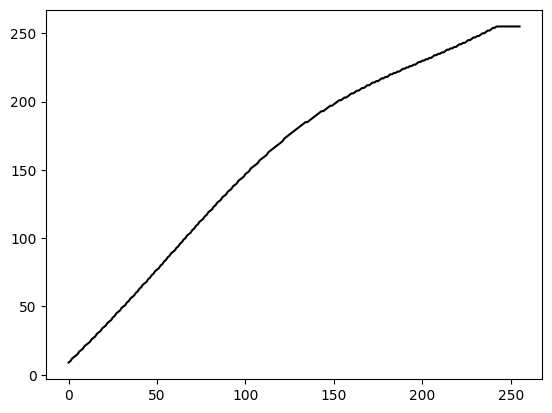

In [12]:
def get_intensity_transform(a, sigma):
    def intensity_transform(x):
        return min((int(x + a * 128 * np.exp(-((x - 128) ** 2) / (2 * sigma ** 2)))), 255)
    return intensity_transform

f = get_intensity_transform(0.4, 70)
transform = np.array([f(i) for i in range(256)], dtype=np.uint8)
plt.plot(np.arange(0, 256), transform, color='black')
plt.show()

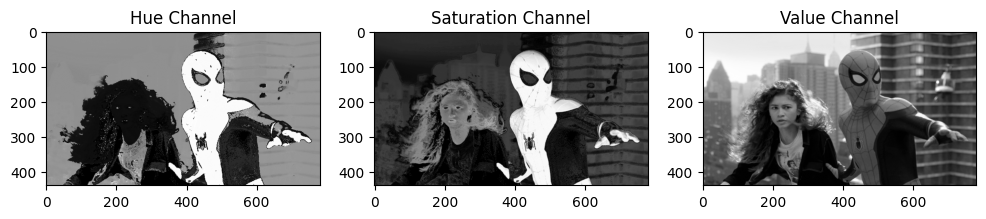

In [13]:
spider_img = Image.open('a1images/spider.png')

spider_img = np.array(spider_img)
spider_img_hsv = cv.cvtColor(spider_img, cv.COLOR_RGB2HSV)

# Display the hue, saturation, and value components
hue_channel = spider_img_hsv[:, :, 0]
saturation_channel = spider_img_hsv[:, :, 1]
value_channel = spider_img_hsv[:, :, 2]

fig, axs = plt.subplots(1, 3, figsize=(12, 6))
axs[0].imshow(hue_channel, cmap='gray')
axs[0].set_title('Hue Channel')
axs[1].imshow(saturation_channel, cmap='gray')
axs[1].set_title('Saturation Channel')
axs[2].imshow(value_channel, cmap='gray')
axs[2].set_title('Value Channel')
plt.show()

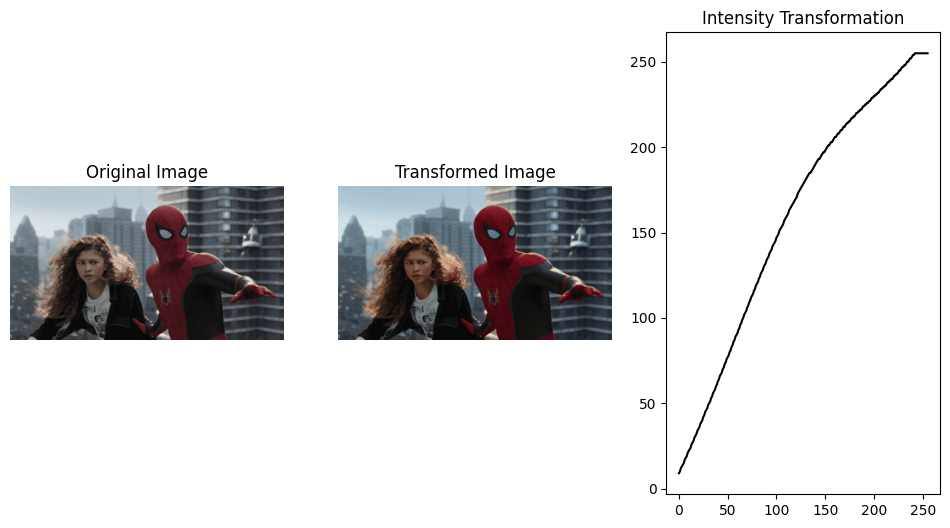

In [14]:
spider_img_transformed_hsv = spider_img_hsv.copy()
spider_img_transformed_hsv[:, :, 1] = cv.LUT(spider_img_transformed_hsv[:, :, 1], transform)
spider_img_transformed = cv.cvtColor(spider_img_transformed_hsv, cv.COLOR_HSV2RGB)

fig, axs = plt.subplots(1, 3, figsize=(12, 6))
axs[0].imshow(spider_img)
axs[0].set_title('Original Image')
axs[0].axis('off')
axs[1].imshow(spider_img_transformed)
axs[1].set_title('Transformed Image')
axs[1].axis('off')
axs[2].plot(np.arange(0, 256), transform, color='black')
axs[2].set_title('Intensity Transformation')
plt.show()

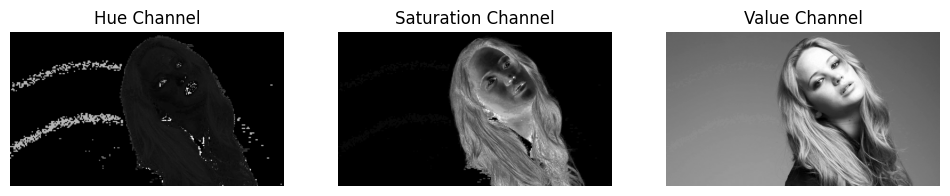

In [41]:
jenn_img = Image.open("a1images/jeniffer.jpg")

jenn_img = np.array(jenn_img)
jenn_img_hsv = cv.cvtColor(jenn_img, cv.COLOR_RGB2HSV)

%matplotlib inline

# display each plane
fig, axs = plt.subplots(1, 3, figsize=(12, 6))
axs[0].imshow(jenn_img_hsv[:, :, 0], cmap='gray')
axs[0].set_title('Hue Channel')
axs[0].axis('off')
axs[1].imshow(jenn_img_hsv[:, :, 1], cmap='gray')
axs[1].set_title('Saturation Channel')
axs[1].axis('off')
axs[2].imshow(jenn_img_hsv[:, :, 2], cmap='gray')
axs[2].set_title('Value Channel')
axs[2].axis('off')
plt.show()

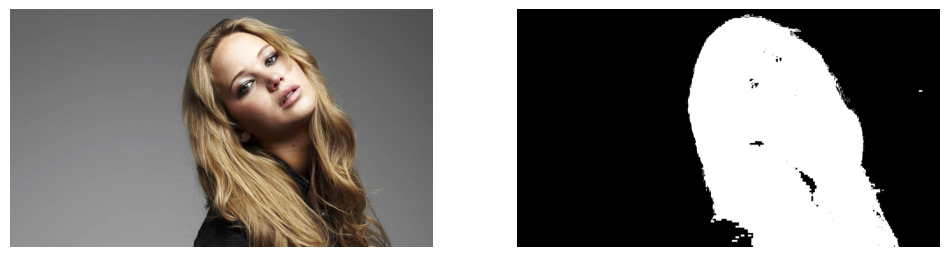

In [42]:
saturation_channel = jenn_img_hsv[:, :, 1]

mask = cv.inRange(saturation_channel, 12, 256)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(jenn_img)
axs[0].axis('off')
axs[1].imshow(mask, cmap='gray')
axs[1].axis('off')
plt.show()

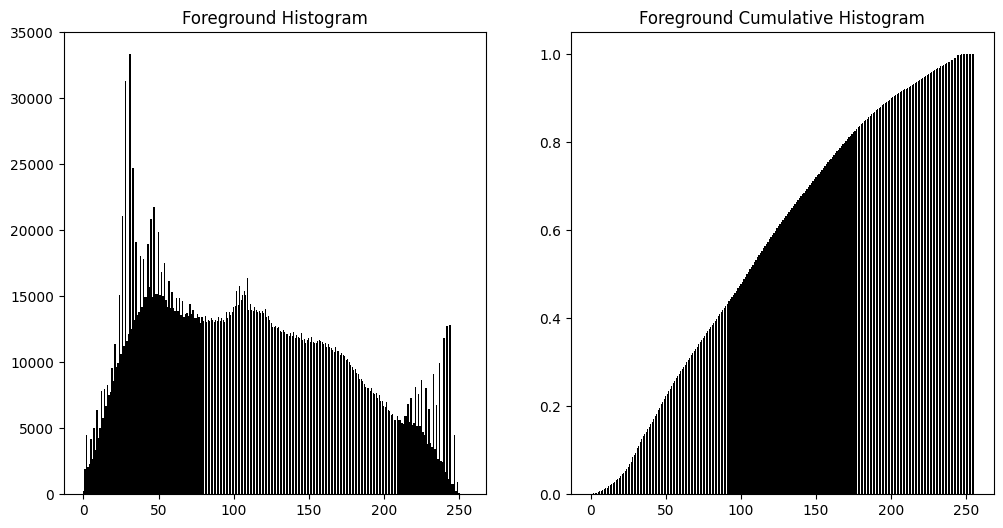

In [75]:
jenn_img_gray = cv.cvtColor(jenn_img, cv.COLOR_RGB2GRAY)  

# plt.imshow(jenn_foreground, cmap='gray')

jenn_foreground_hist = cv.calcHist([jenn_img_gray], [0], mask, [256], [0, 256])
jenn_foreground_hist_cum = np.cumsum(jenn_foreground_hist)
total_pixels = np.sum(jenn_foreground_hist)
jenn_foreground_hist_cum_norm = jenn_foreground_hist_cum / total_pixels

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].bar(np.arange(256), jenn_foreground_hist.ravel(), color='black')
axs[0].set_title('Foreground Histogram')
axs[1].bar(np.arange(256), jenn_foreground_hist_cum_norm.ravel(), color='black')
axs[1].set_title('Foreground Cumulative Histogram')
plt.show()


[  0   0   0   0   1   1   1   2   2   3   3   3   4   5   5   6   7   8
   8   9  10  11  12  13  14  15  17  18  21  22  23  27  28  30  31  33
  34  36  37  39  40  42  43  45  46  48  50  52  53  55  56  58  59  61
  62  64  65  67  68  69  71  72  73  75  76  77  79  80  81  83  84  85
  86  88  89  90  91  93  94  95  96  98  99 100 101 103 104 105 106 108
 109 110 111 112 114 115 116 118 119 120 121 123 124 126 127 128 130 131
 133 134 135 137 138 139 141 142 143 145 146 147 149 150 151 152 154 155
 156 157 158 160 161 162 163 164 165 166 168 169 170 171 172 173 174 175
 177 178 179 180 181 182 183 184 185 186 188 189 190 191 192 193 194 195
 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213
 214 215 216 216 217 218 219 220 220 221 222 223 223 224 225 226 226 227
 228 228 229 230 230 231 231 232 232 233 234 234 235 235 236 236 237 237
 238 238 239 240 240 241 241 242 243 243 244 244 245 245 246 246 247 247
 248 248 249 250 250 250 251 251 252 253 254 254 25

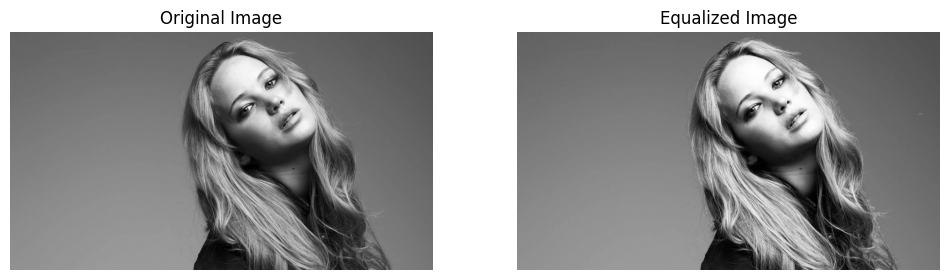

In [84]:
hist_transform = np.array([int(255 * jenn_foreground_hist_cum_norm[i]) for i in range(256)], dtype=np.uint8)
print(hist_transform)

jenn_img_gray_foreground_eq = cv.bitwise_and(cv.LUT(jenn_img_gray, hist_transform), mask)   
jenn_img_gray_background = cv.bitwise_and(jenn_img_gray, cv.bitwise_not(mask))
jenn_img_gray_eq = cv.bitwise_or(jenn_img_gray_foreground_eq, jenn_img_gray_background)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(jenn_img_gray, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')
axs[1].imshow(jenn_img_gray_eq, cmap='gray')
axs[1].set_title('Equalized Image')
axs[1].axis('off')
plt.show()

In [125]:
einstein_img = Image.open("a1images/einstein.png")

einstein_img = np.array(einstein_img)
einstein_img = cv.cvtColor(einstein_img, cv.COLOR_RGB2GRAY)
print(einstein_img.shape)

(380, 364)


(380, 364)
-752.0 727.0
-630.0 708.0
0.0 756.6372975210778


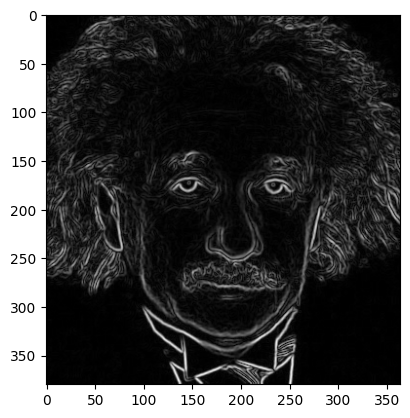

In [136]:
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
einstein_img_gradient_x = cv.filter2D(einstein_img, cv.CV_64F, sobel_x)
einstein_img_gradient_y = cv.filter2D(einstein_img, cv.CV_64F, sobel_y)
einstein_img_sobel1 = np.sqrt(einstein_img_gradient_x**2 + einstein_img_gradient_y**2)
print(einstein_img_sobel1.shape)

print(einstein_img_gradient_x.min(), einstein_img_gradient_x.max())
print(einstein_img_gradient_y.min(), einstein_img_gradient_y.max())
print(einstein_img_sobel1.min(), einstein_img_sobel1.max())

plt.imshow(einstein_img_sobel1, cmap='gray')
plt.show()

Einstein sobel2 x min/max -750.0 727.0
Einstein sobel2 y min/max -630.0 708.0
Einstein sobel2 min/max 0.0 756.6372975210778
Einstein x diff min/max 0.0 0.0
Einstein y diff min/max 0.0 0.0
Einstiein dtypes float64 float64
Mag1 min/max 0.0 756.6372975210778
Mag2 min/max 0.0 756.6372975210778


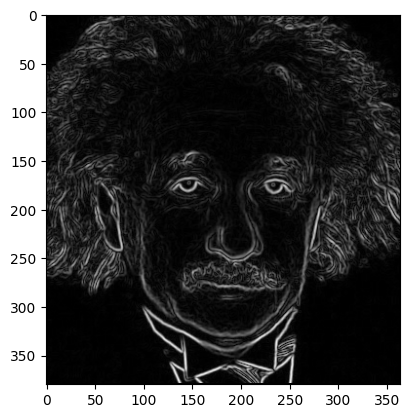

In [140]:
def custom_sobel_filter(image):
    rows, col = image.shape
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
    sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype=np.float32)

    image_x = np.zeros_like(image, dtype=np.float64)
    image_y = np.zeros_like(image, dtype=np.float64)

    for i in range(1, rows-1):
        for j in range(1, col-1):
            neighborhood = image[i-1:i+2, j-1:j+2]

            image_x[i, j] = (np.sum(neighborhood * sobel_x))
            image_y[i, j] = np.sum(neighborhood * sobel_y)

    return np.sqrt(image_x**2 + image_y**2), image_x, image_y

einstein_img_sobel2, einstein_img_sobel2_x, einstein_img_sobel2_y = custom_sobel_filter(einstein_img)



print('Einstein sobel2 x min/max', einstein_img_sobel2_x.min(), einstein_img_sobel2_x.max())
print('Einstein sobel2 y min/max', einstein_img_sobel2_y.min(), einstein_img_sobel2_y.max())
print('Einstein sobel2 min/max', einstein_img_sobel2.min(), einstein_img_sobel2.max())

diff = einstein_img_gradient_x[1:-1, 1:-1] - einstein_img_sobel2_x[1:-1, 1:-1]
print('Einstein x diff min/max', diff.min(), diff.max())

diff = einstein_img_gradient_y[1:-1, 1:-1] - einstein_img_sobel2_y[1:-1, 1:-1]
print('Einstein y diff min/max', diff.min(), diff.max())

print('Einstiein dtypes', einstein_img_sobel2_x.dtype, einstein_img_gradient_x.dtype)

mag1 = np.sqrt(einstein_img_sobel2_x[1:-1, 1:-1]**2 + einstein_img_sobel2_y[1:-1, 1:-1]**2)
mag2 = np.sqrt(einstein_img_gradient_x[1:-1, 1:-1]**2 + einstein_img_gradient_y[1:-1, 1:-1]**2)

print('Mag1 min/max', mag1.min(), mag1.max())
print('Mag2 min/max', mag2.min(), mag2.max())

plt.imshow(einstein_img_sobel2, cmap='gray')
plt.show()

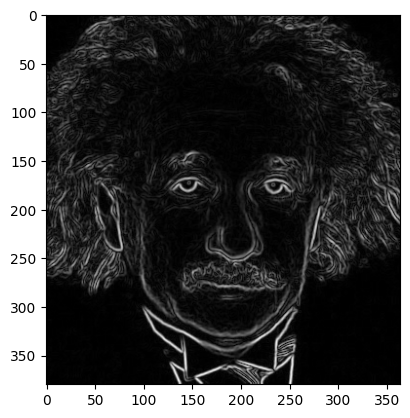

In [145]:
def separable_sobel(image):
    # For Sobel X: first apply [1,2,1]^T, then [-1,0,1]
    temp = cv.filter2D(image, cv.CV_64F, np.array([[1], [2], [1]]))
    gradient_x = cv.filter2D(temp, cv.CV_64F, np.array([[-1, 0, 1]]))

    # For Sobel Y: first apply [1,0,1]^T, then [-1,0,1]
    temp = cv.filter2D(image, cv.CV_64F, np.array([[1], [0], [-1]]))
    gradient_y = cv.filter2D(temp, cv.CV_64F, np.array([[1, 2, 1]]))

    image_sobel = np.sqrt(gradient_x**2 + gradient_y**2)    

    return image_sobel

einstein_img_sobel3 = separable_sobel(einstein_img)

plt.imshow(einstein_img_sobel3, cmap='gray')
plt.show()

1920 1080 480 270
4.0 4.0


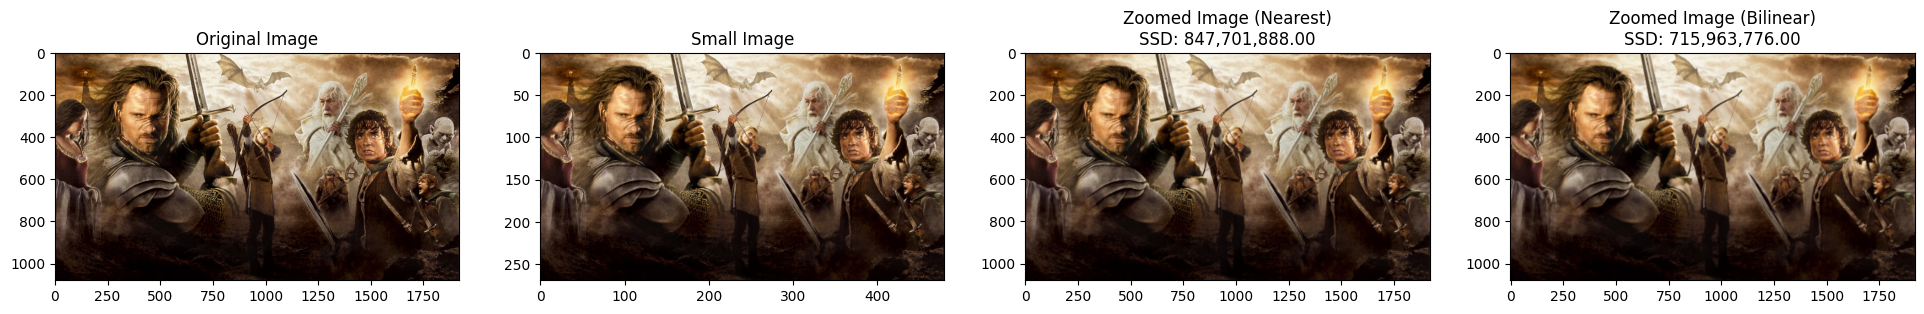

In [169]:
def zoom_images(original_image, small_image):
    img = Image.open(original_image)
    img_small = Image.open(small_image)

    w, h = img.size
    w_small, h_small = img_small.size

    img = np.array(img)
    img_small = np.array(img_small)

    print(w, h, w_small, h_small)
    print(w / w_small, h / h_small)

    img_zoom_nearest = cv.resize(img_small, (w, h), interpolation=cv.INTER_NEAREST)
    img_zoom_bilinear = cv.resize(img_small, (w, h), interpolation=cv.INTER_LINEAR)

    ssd_nearest = np.sum((img.astype(np.float32) - img_zoom_nearest.astype(np.float32))**2)
    ssd_bilinear = np.sum((img.astype(np.float32) - img_zoom_bilinear.astype(np.float32))**2)

    fig, axs = plt.subplots(1, 4, figsize=(24, 6))
    axs[0].imshow(img)
    axs[0].set_title("Original Image")
    axs[1].imshow(img_small)
    axs[1].set_title("Small Image")
    axs[2].imshow(img_zoom_nearest)
    axs[2].set_title("Zoomed Image (Nearest)\nSSD: {:,.2f}".format(ssd_nearest))
    axs[3].imshow(img_zoom_bilinear)
    axs[3].set_title("Zoomed Image (Bilinear)\nSSD: {:,.2f}".format(ssd_bilinear))
    plt.show()

zoom_images("a1images/a1q8images/im01.png", "a1images/a1q8images/im01small.png")

1920 1200 480 300
4.0 4.0


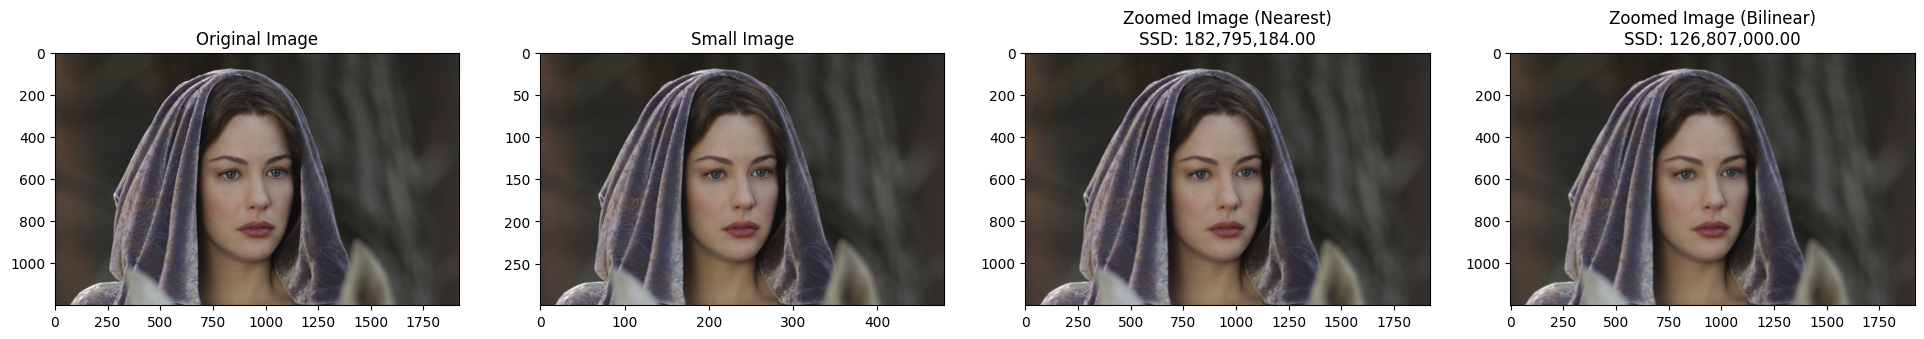

In [170]:
zoom_images("a1images/a1q8images/im02.png", "a1images/a1q8images/im02small.png")

2400 1459 600 365
4.0 3.9972602739726026


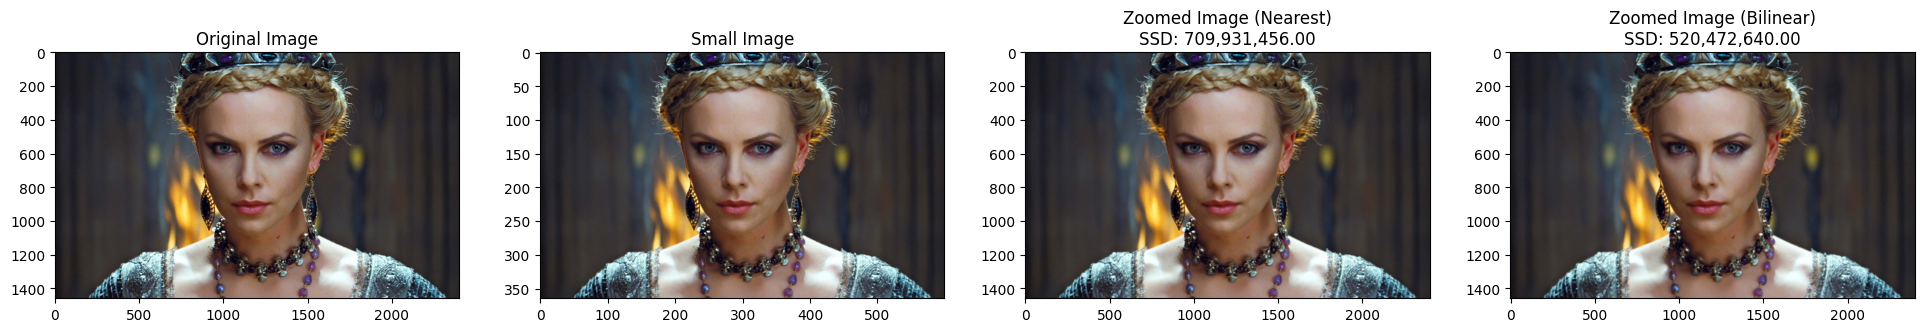

In [171]:
zoom_images("a1images/a1q8images/im03.png", "a1images/a1q8images/im03small.png")

1000 560 200 112
5.0 5.0


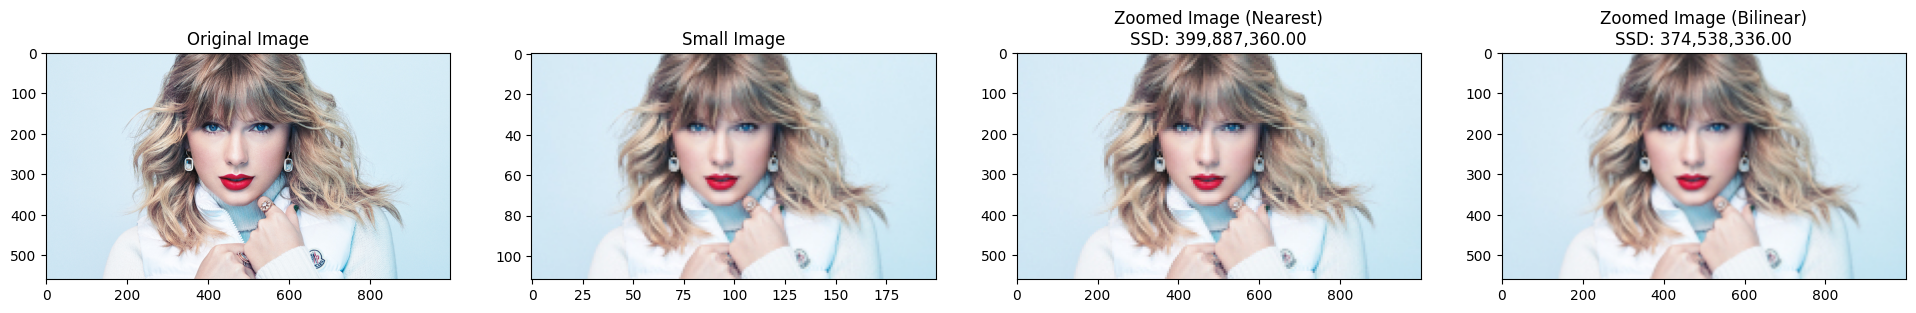

In [172]:
zoom_images("a1images/a1q8images/taylor.jpg", "a1images/a1q8images/taylor_small.jpg")

1000 560 50 28
20.0 20.0


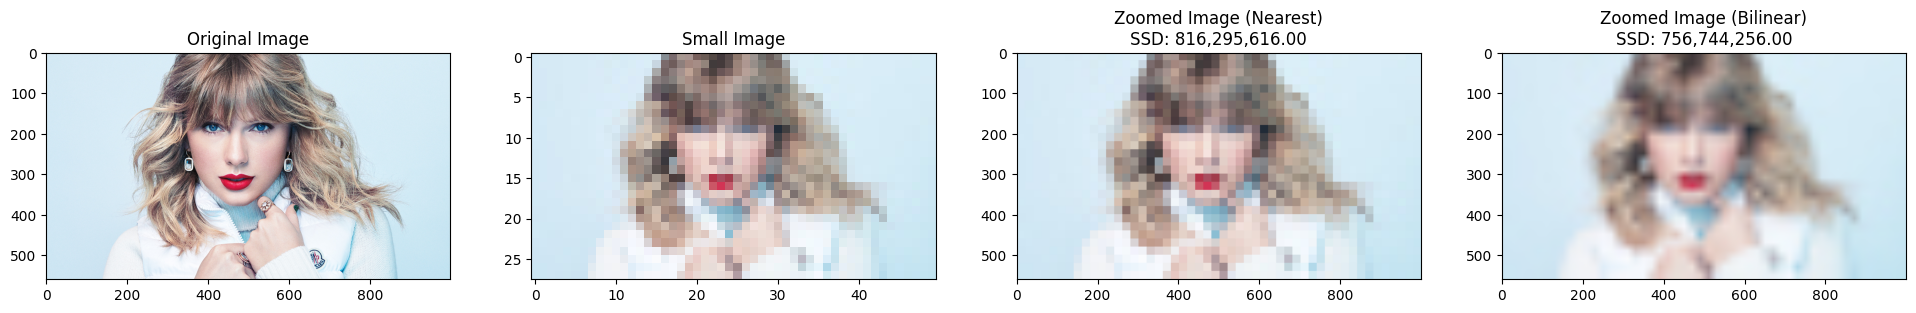

In [173]:
zoom_images("a1images/a1q8images/taylor.jpg", "a1images/a1q8images/taylor_very_small.jpg")

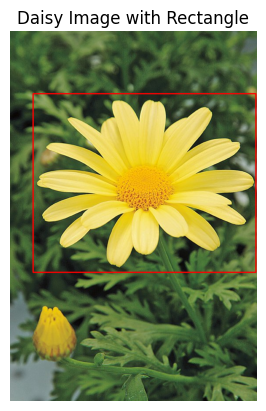

In [177]:
daisy_img = Image.open("a1images/daisy.jpg")

daisy_img = np.array(daisy_img)

rect = (52, 142, 558, 548)
daisy_drawn = cv.rectangle(daisy_img.copy(), (rect[0], rect[1]), (rect[2], rect[3]), (255, 0, 0), 2)

plt.imshow(daisy_drawn)
plt.title("Daisy Image with Rectangle")
plt.axis("off")
plt.show()

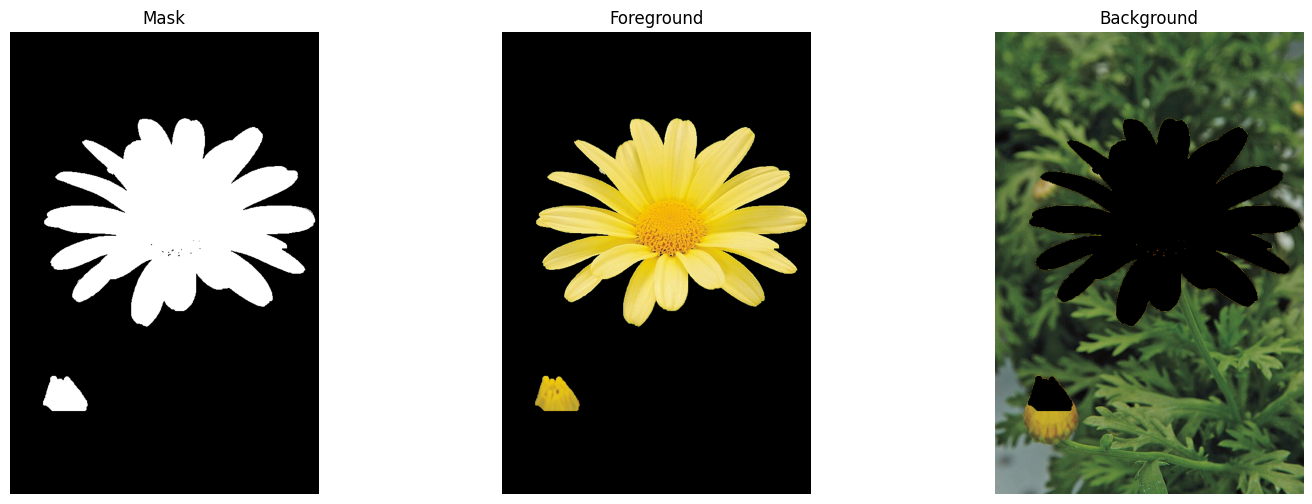

In [181]:
mask = np.zeros(daisy_img.shape[:2], dtype=np.uint8)

bgModel, fgModel = np.zeros((1, 65), np.float64), np.zeros((1, 65), np.float64)

cv.grabCut(daisy_img, mask, rect, bgModel, fgModel, 5, cv.GC_INIT_WITH_RECT)

mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

daisy_foreground = daisy_img * mask2[:, :, np.newaxis]
daisy_background = daisy_img * (1 - mask2[:, :, np.newaxis])

fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].imshow(mask2, cmap='gray')
axs[0].set_title("Mask")
axs[0].axis('off')
axs[1].imshow(daisy_foreground)
axs[1].set_title("Foreground")
axs[1].axis('off')
axs[2].imshow(daisy_background)
axs[2].set_title("Background")
axs[2].axis('off')
plt.show()

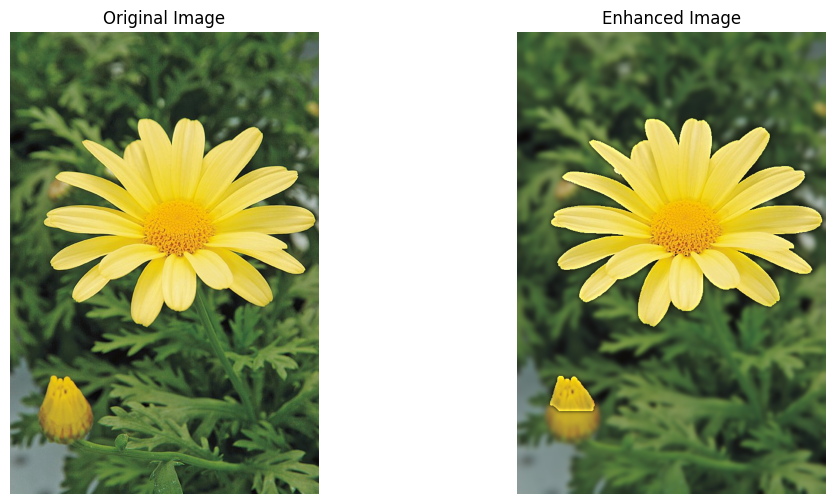

In [182]:
daisy_background_blurred = cv.GaussianBlur(daisy_background, (21, 21), 0)

daisy_enhanced = cv.addWeighted(daisy_foreground, 1, daisy_background_blurred, 1, 0)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(daisy_img)
axs[0].set_title("Original Image")
axs[0].axis('off')
axs[1].imshow(daisy_enhanced)
axs[1].set_title("Enhanced Image")
axs[1].axis('off')
plt.show()